# Overfitting

In [4]:
import pandas as pd

In [6]:
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names=columns)
cars = cars[cars['horsepower'] != '?']
cars['horsepower'] = cars['horsepower'].astype(float)

## Bias and Variance

**Bias**: Error in accuracy of prediction model  
**Variance**: Error from variability of predicted value

**Want low bias *and* low variance, but there is always a trade-off**

![img](bias-var.png){float:left}

In [7]:
filtered_cars = cars

In [9]:
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

def train_and_cross_val(cols):
    kf = KFold(filtered_cars.shape[0],n_folds=10,shuffle=True,random_state=3)
    X=filtered_cars[cols]
    y=filtered_cars['mpg']
    MSE=[]
    VAR=[]
    for train_index, test_index in kf:
        #print(train_index, test_index, filtered_cars.shape[0])
        X_train, y_train = X.iloc[train_index], y.iloc[train_index]
        X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    
        lr = LinearRegression()
        lr.fit(X_train,y_train)
        predict=lr.predict(X_test)
        mse= np.mean((y_test-predict)**2)
        var= np.var(predict)
        MSE.append(mse)
        VAR.append(var)
    return (np.mean(MSE),np.mean(VAR))
    
two_mse, two_var = train_and_cross_val(["cylinders",'displacement'])
three_mse, three_var = train_and_cross_val(["cylinders",'displacement','horsepower'])
four_mse, four_var = train_and_cross_val(["cylinders",'displacement','horsepower','weight'])
five_mse, five_var = train_and_cross_val(["cylinders",'displacement','horsepower','weight','acceleration'])
six_mse, six_var = train_and_cross_val(["cylinders",'displacement','horsepower','weight','acceleration','model year'])
seven_mse, seven_var = train_and_cross_val(["cylinders",'displacement','horsepower','weight','acceleration','model year','origin'])

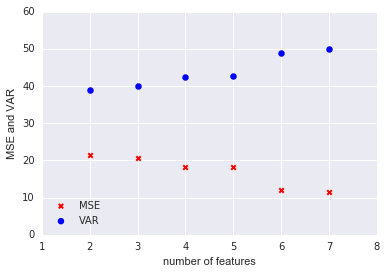

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
        
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

sc1=plt.scatter(x=np.arange(2,8),y=[two_mse,three_mse,four_mse,five_mse,six_mse,seven_mse],color='red', marker='x',linewidth='2')

sc2=plt.scatter(x=np.arange(2,8),y=[two_var,three_var,four_var,five_var,six_var,seven_var],color='blue', marker='o',linewidth='2')
plt.xlabel('number of features')
plt.ylabel('MSE and VAR')
plt.legend((sc1, sc2),('MSE','VAR'),loc='lower left')
sns.plt.show()